In [1]:
import numpy as np

a=np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [7]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic=time.time()
c=np.dot(a,b)
toc=time.time()

print(c)
print("vectorized version:"+str(1000*(toc-tic))+"ms")


c=0
tic = time.time()
for i in range(len(a)):
    c+=a[i]*b[i]
toc = time.time()

print(c)
print("For loop:"+str(1000*(toc-tic))+"ms")

249594.7383072445
vectorized version:1.4383792877197266ms
249594.73830724895
For loop:884.2477798461914ms


In [8]:
a[:50]

array([0.10901792, 0.42630624, 0.74204732, 0.75637274, 0.48153365,
       0.35156179, 0.68033109, 0.50467422, 0.16014408, 0.66560033,
       0.96564648, 0.8226268 , 0.21483709, 0.61799819, 0.36766051,
       0.36477723, 0.90902527, 0.65694692, 0.61796155, 0.65547424,
       0.41771259, 0.23580238, 0.30553263, 0.50965636, 0.10489075,
       0.58567586, 0.02128291, 0.66074523, 0.43606252, 0.39483011,
       0.12497278, 0.18101165, 0.68712735, 0.72916653, 0.42901459,
       0.35918617, 0.70279552, 0.30208969, 0.29556581, 0.29027895,
       0.70086424, 0.96203967, 0.39011846, 0.04410491, 0.6490427 ,
       0.68194979, 0.1374524 , 0.14274345, 0.44413439, 0.98669852])

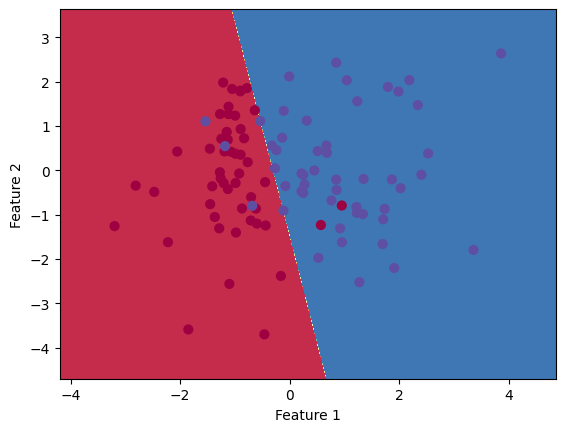

Accuracy of logistic regression with CV: 93.00% (percentage of correctly labelled datapoints)


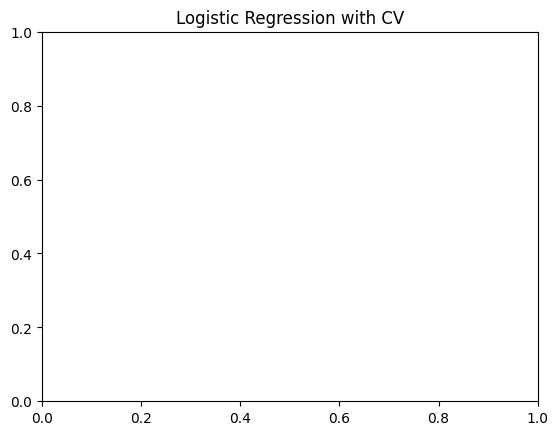

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_classification

# 데이터 생성
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

# Logistic Regression Classifier 학습
clf = LogisticRegressionCV(cv=5, random_state=0)
clf.fit(X, Y)

# 결정 경계 시각화 함수 정의
def plot_decision_boundary(pred_func, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression with CV")

# 정확도 출력
LR_predictions = clf.predict(X)
accuracy = np.mean(LR_predictions == Y) * 100
print('Accuracy of logistic regression with CV: %.2f%% (percentage of correctly labelled datapoints)' % accuracy)
